# RBM training $L =10$ - Dataset with $ T = 0$ and $ T = \infty$

In order to investigate the RBM flow in an extreme situation, we train the machine in an dataset composed only by frozen and random states. 

It is crucial to note that, since the visible layer is always fed with an unidimensional vector (an array is transformed in a vector to be fed in the visible layer), the machine does not have any geometric information about the lattice in this case.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split

from rbm import RBM
from mc_ising2d import IsingMC

import torch
import torch.nn as nn
torch.manual_seed(12)

L = 10

## Creating the dataset

#### Frozen configurations $T=0$:

In [2]:
n_states = 1000

data_lowT_up = nn.init.constant_(torch.empty(int(n_states/2), L*L),
                                     val= 1.0)

data_lowT_down = nn.init.constant_(torch.empty(int(n_states/2), L*L),
                                     val= 0.0)

data_set_low = torch.cat((data_lowT_down, data_lowT_up), 0)

#### Random configurations $T= \infty$:

In [4]:
nstates = 1000

up = nn.init.constant_(torch.empty(int(L*L/2)),
                                     val= 1.0)
down = nn.init.constant_(torch.empty(int(L*L/2)),
                                     val= 0.0)

up_down = torch.cat((up,down), 0)

data_set_high = up_down.reshape(1, up_down.shape[0])

for j in range(nstates - 1):
    
    data_set_high_ = up_down[torch.randperm(up_down.shape[0]) ]
    
    data_set_high = torch.cat( ( data_set_high, data_set_high_.reshape(1, data_set_high_.shape[0])), 0 )

#### Constructing training and test sets

Using `train_test_split` from [`sklearn`](http://scikit-learn.org/) it is easy to split the data into training and test sets.

In [4]:
train_data_low, test_data_low = train_test_split(np.array(data_set_low), 
                                                 test_size= 0.2, 
                                                 random_state= 12)

train_data_high, test_data_high = train_test_split(np.array(data_set_high),
                                                   test_size= 0.2,
                                                   random_state= 12)

In [5]:
training_set = torch.cat((torch.Tensor(train_data_low), torch.Tensor(train_data_high)), 0)
test_set = torch.cat((torch.Tensor(test_data_low), torch.Tensor(test_data_high)), 0)

training_set = training_set[torch.randperm(training_set.size()[0])]

#### Training the model

Our code implementing a Restricted Boltzmann Machine is written a python class called `RBM` which is imported from `rbm.py`.

For simplification, the units have no bias and the RBM stochasticity parameter, represented below by $T$ is set to unity, as usual in most practical applications. Note that we set `use_cuda=True`, which makes use of [CUDA tensor types](https://pytorch.org/docs/stable/cuda.html), implementing GPU computation. If a GPU is not available, one should just set `use_cuda=False`.

RBM --- Nv= 100, Nh= 100, lr= 1.0E-02, k= 1, Bsize= 100, Epochs= 30000, USE_CUDA= True, verbose= 100
Starting training
Ep 100, Rec er: 0.330219 (train), 0.334700 (test), Pseud_Lik: -30.775922, Time: 1.747417, 
Ep 200, Rec er: 0.326894 (train), 0.332700 (test), Pseud_Lik: -25.219355, Time: 1.747912, 
Ep 300, Rec er: 0.324850 (train), 0.325050 (test), Pseud_Lik: -22.527420, Time: 2.057067, 
Ep 400, Rec er: 0.323575 (train), 0.328750 (test), Pseud_Lik: -20.958872, Time: 1.774407, 
Ep 500, Rec er: 0.323062 (train), 0.326675 (test), Pseud_Lik: -19.535299, Time: 1.545147, 
Ep 600, Rec er: 0.319919 (train), 0.325975 (test), Pseud_Lik: -18.912360, Time: 1.475808, 
Ep 700, Rec er: 0.318194 (train), 0.324000 (test), Pseud_Lik: -17.277523, Time: 1.463333, 
Ep 800, Rec er: 0.313637 (train), 0.322100 (test), Pseud_Lik: -17.138310, Time: 1.500836, 
Ep 900, Rec er: 0.311837 (train), 0.320925 (test), Pseud_Lik: -17.175467, Time: 1.532591, 
Ep 1000, Rec er: 0.311312 (train), 0.320275 (test), Pseud_Lik:

Ep 9000, Rec er: 0.225144 (train), 0.241250 (test), Pseud_Lik: -8.428611, Time: 1.422862, 
Ep 9100, Rec er: 0.223575 (train), 0.240700 (test), Pseud_Lik: -7.926714, Time: 1.434722, 
Ep 9200, Rec er: 0.223275 (train), 0.240900 (test), Pseud_Lik: -7.936489, Time: 1.435086, 
Ep 9300, Rec er: 0.223950 (train), 0.240075 (test), Pseud_Lik: -7.675186, Time: 1.425198, 
Ep 9400, Rec er: 0.223037 (train), 0.241950 (test), Pseud_Lik: -8.362518, Time: 1.428365, 
Ep 9500, Rec er: 0.221887 (train), 0.239750 (test), Pseud_Lik: -7.899510, Time: 1.412698, 
Ep 9600, Rec er: 0.221675 (train), 0.240675 (test), Pseud_Lik: -8.491242, Time: 1.436177, 
Ep 9700, Rec er: 0.220631 (train), 0.237975 (test), Pseud_Lik: -8.280087, Time: 1.431176, 
Ep 9800, Rec er: 0.223744 (train), 0.237475 (test), Pseud_Lik: -8.195754, Time: 1.435342, 
Ep 9900, Rec er: 0.221631 (train), 0.237925 (test), Pseud_Lik: -7.933362, Time: 1.462224, 
Ep 10000, Rec er: 0.220656 (train), 0.236725 (test), Pseud_Lik: -7.429410, Time: 1.467324,

Ep 18000, Rec er: 0.203819 (train), 0.218800 (test), Pseud_Lik: -6.285543, Time: 1.434875, 
Ep 18100, Rec er: 0.203675 (train), 0.217000 (test), Pseud_Lik: -6.500322, Time: 1.892221, 
Ep 18200, Rec er: 0.205612 (train), 0.220875 (test), Pseud_Lik: -6.587291, Time: 1.599944, 
Ep 18300, Rec er: 0.203894 (train), 0.220975 (test), Pseud_Lik: -6.242312, Time: 1.460843, 
Ep 18400, Rec er: 0.203544 (train), 0.223100 (test), Pseud_Lik: -6.418962, Time: 1.484081, 
Ep 18500, Rec er: 0.203362 (train), 0.219550 (test), Pseud_Lik: -6.371654, Time: 1.520926, 
Ep 18600, Rec er: 0.204650 (train), 0.219875 (test), Pseud_Lik: -5.969633, Time: 1.506855, 
Ep 18700, Rec er: 0.203862 (train), 0.220125 (test), Pseud_Lik: -6.012980, Time: 1.527973, 
Ep 18800, Rec er: 0.203637 (train), 0.219450 (test), Pseud_Lik: -6.440935, Time: 1.543636, 
Ep 18900, Rec er: 0.204706 (train), 0.219200 (test), Pseud_Lik: -5.957185, Time: 1.560441, 
Ep 19000, Rec er: 0.203675 (train), 0.218800 (test), Pseud_Lik: -6.064601, Time:

Ep 27000, Rec er: 0.199250 (train), 0.212550 (test), Pseud_Lik: -5.932187, Time: 1.678138, 
Ep 27100, Rec er: 0.198356 (train), 0.216200 (test), Pseud_Lik: -5.188807, Time: 1.619063, 
Ep 27200, Rec er: 0.199406 (train), 0.217100 (test), Pseud_Lik: -5.466689, Time: 1.562256, 
Ep 27300, Rec er: 0.199087 (train), 0.213025 (test), Pseud_Lik: -4.868303, Time: 1.486656, 
Ep 27400, Rec er: 0.198750 (train), 0.213050 (test), Pseud_Lik: -5.544203, Time: 1.502823, 
Ep 27500, Rec er: 0.198831 (train), 0.212650 (test), Pseud_Lik: -5.330831, Time: 1.524927, 
Ep 27600, Rec er: 0.197794 (train), 0.213950 (test), Pseud_Lik: -5.164912, Time: 1.866060, 
Ep 27700, Rec er: 0.198612 (train), 0.214875 (test), Pseud_Lik: -5.548812, Time: 2.186737, 
Ep 27800, Rec er: 0.198562 (train), 0.214875 (test), Pseud_Lik: -6.011355, Time: 2.028886, 
Ep 27900, Rec er: 0.200150 (train), 0.212200 (test), Pseud_Lik: -4.963211, Time: 2.133056, 
Ep 28000, Rec er: 0.197625 (train), 0.213600 (test), Pseud_Lik: -5.634849, Time:

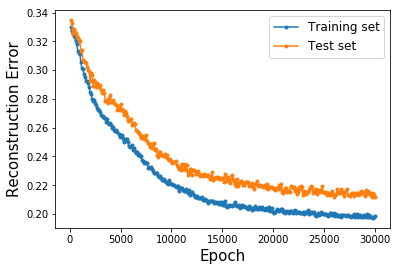

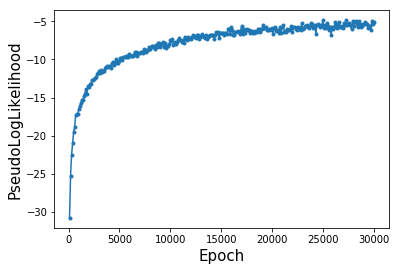

In [6]:
Nv = training_set.shape[1]
Nh = training_set.shape[1]

lr = 0.01
k_learning = 1
batch_size = 100
nb_epoch = 30000
k_sampling = 1

rbm = RBM(num_visible= Nv, 
          num_hidden= Nh, 
          bias= False,
          T= 1.0,
          use_cuda= True)
    
rbm.learn(training_set= training_set,
          test_set = test_set,
          lr= lr, 
          nb_epoch= nb_epoch, 
          batch_size= batch_size,
          k_learning= k_learning,
          k_sampling= k_sampling,
          verbose= 100)

#### Saving the trained model

In [7]:
nb_epoch = rbm.num_train_epochs()

name = 'RBM_model_only_Tzero_Tinf__UP_DOWN_nv%d_nh%d_lr%.1E_k%d_bsize%d_nepochs%d' % (Nv,
                                                                                      Nh,
                                                                                      lr,
                                                                                      k_learning,
                                                                                      batch_size,
                                                                                      nb_epoch)

PATH = 'RBM_trained_models/'+ name + '.pt'

torch.save(rbm, PATH)

### Weights distribution

In [8]:
W, v, h = rbm.parameters()

del v
del h
torch.cuda.empty_cache()

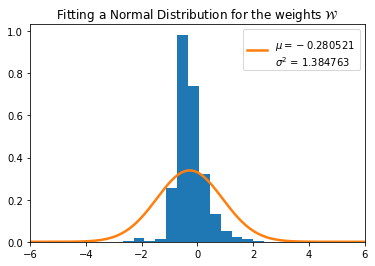

In [16]:
W_ = W.cpu().numpy().reshape((W.shape[0]*W.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 200, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma^2$ = %f' % (muW_, sigmaW_**2 ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.xlim([-6, 6])
plt.show()

In [17]:
del W
torch.cuda.empty_cache()

### Case $T=0$ "UP" and $ T = \infty$

#### Creating the dataset

Frozen configurations:

In [2]:
n_states = 1000

training_lowT_up = nn.init.constant_(torch.empty(n_states, L*L),
                                     val= 1.0)

Constructing and shuffling the training set:

In [5]:
training_set = torch.cat((training_lowT_up, data_set_high), 0)

training_set = training_set[torch.randperm(training_set.size()[0])]

#### Training the model

For simplification, the units have no bias.

RBM --- Nv= 100, Nh= 100, lr= 1.0E-02, k= 1, Bsize= 100, Epochs= 30000, USE_CUDA= True, verbose= 100
Starting training
Ep 100, Rec er: 0.341955 (train), Pseud_Lik: -40.403549, Time: 1.743638 
Ep 200, Rec er: 0.339390 (train), Pseud_Lik: -39.962323, Time: 1.715114 
Ep 300, Rec er: 0.335250 (train), Pseud_Lik: -39.105478, Time: 1.870601 
Ep 400, Rec er: 0.329195 (train), Pseud_Lik: -39.067809, Time: 1.893640 
Ep 500, Rec er: 0.323775 (train), Pseud_Lik: -39.194043, Time: 1.844652 
Ep 600, Rec er: 0.316320 (train), Pseud_Lik: -38.290583, Time: 1.846209 
Ep 700, Rec er: 0.308020 (train), Pseud_Lik: -37.047874, Time: 1.818094 
Ep 800, Rec er: 0.301305 (train), Pseud_Lik: -36.346587, Time: 1.709892 
Ep 900, Rec er: 0.293080 (train), Pseud_Lik: -36.337686, Time: 1.716494 
Ep 1000, Rec er: 0.285580 (train), Pseud_Lik: -35.779083, Time: 1.848125 
Ep 1100, Rec er: 0.279720 (train), Pseud_Lik: -34.097819, Time: 2.077767 
Ep 1200, Rec er: 0.273820 (train), Pseud_Lik: -33.327614, Time: 2.063140 
Ep

Ep 11100, Rec er: 0.097760 (train), Pseud_Lik: -7.180193, Time: 1.974321 
Ep 11200, Rec er: 0.098660 (train), Pseud_Lik: -7.681599, Time: 2.026307 
Ep 11300, Rec er: 0.096845 (train), Pseud_Lik: -7.846447, Time: 2.233047 
Ep 11400, Rec er: 0.098645 (train), Pseud_Lik: -7.521471, Time: 2.409708 
Ep 11500, Rec er: 0.097070 (train), Pseud_Lik: -7.241749, Time: 2.067555 
Ep 11600, Rec er: 0.095750 (train), Pseud_Lik: -7.462666, Time: 2.053071 
Ep 11700, Rec er: 0.096890 (train), Pseud_Lik: -7.106014, Time: 2.089989 
Ep 11800, Rec er: 0.096160 (train), Pseud_Lik: -7.341338, Time: 2.225335 
Ep 11900, Rec er: 0.095960 (train), Pseud_Lik: -7.111117, Time: 1.902778 
Ep 12000, Rec er: 0.095475 (train), Pseud_Lik: -7.104824, Time: 1.891471 
Ep 12100, Rec er: 0.096035 (train), Pseud_Lik: -7.108536, Time: 1.944767 
Ep 12200, Rec er: 0.095470 (train), Pseud_Lik: -7.160549, Time: 1.960023 
Ep 12300, Rec er: 0.095510 (train), Pseud_Lik: -6.632469, Time: 1.897867 
Ep 12400, Rec er: 0.094775 (train), Ps

Ep 22200, Rec er: 0.080735 (train), Pseud_Lik: -4.352715, Time: 1.809627 
Ep 22300, Rec er: 0.080515 (train), Pseud_Lik: -4.575548, Time: 1.789333 
Ep 22400, Rec er: 0.080790 (train), Pseud_Lik: -4.397241, Time: 1.778580 
Ep 22500, Rec er: 0.080215 (train), Pseud_Lik: -4.932424, Time: 1.784786 
Ep 22600, Rec er: 0.079835 (train), Pseud_Lik: -4.645703, Time: 1.820030 
Ep 22700, Rec er: 0.080190 (train), Pseud_Lik: -4.629869, Time: 1.812779 
Ep 22800, Rec er: 0.080430 (train), Pseud_Lik: -4.589764, Time: 1.863897 
Ep 22900, Rec er: 0.079980 (train), Pseud_Lik: -4.535486, Time: 1.853017 
Ep 23000, Rec er: 0.080115 (train), Pseud_Lik: -4.577662, Time: 1.827410 
Ep 23100, Rec er: 0.079550 (train), Pseud_Lik: -4.358838, Time: 1.835722 
Ep 23200, Rec er: 0.080065 (train), Pseud_Lik: -4.593541, Time: 1.806329 
Ep 23300, Rec er: 0.079375 (train), Pseud_Lik: -4.509192, Time: 1.797464 
Ep 23400, Rec er: 0.079970 (train), Pseud_Lik: -4.301277, Time: 1.792418 
Ep 23500, Rec er: 0.079910 (train), Ps

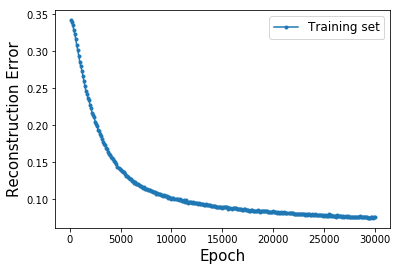

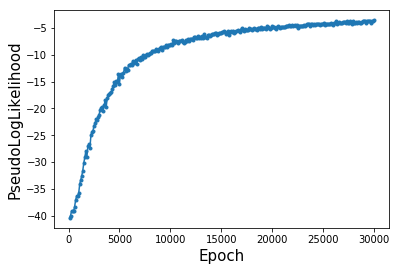

In [7]:
Nv = training_set.shape[1]
Nh = training_set.shape[1]

lr = 0.01
k_learning = 1
batch_size = 100
nb_epoch = 30000
k_sampling = 1

rbm = RBM(num_visible= training_set.shape[1], 
          num_hidden= Nh, 
          bias= False,
          T= 1.0,
          use_cuda= True)
    
rbm.learn(training_set= training_set,  
          lr= lr, 
          nb_epoch= nb_epoch, 
          batch_size= batch_size,
          k_learning= k_learning,
          verbose= 100)

#### Saving the trained model

In [8]:
nb_epoch= rbm.num_train_epochs()

name = 'RBM_model_only_Tzero_Tinf__UP_nv%d_nh%d_lr%.1E_k%d_bsize%d_nepochs%d' % (Nv,
                                                                                 Nh,
                                                                                 lr,
                                                                                 k_learning,
                                                                                 batch_size,
                                                                                 nb_epoch)

PATH = 'RBM_trained_models/'+ name + '.pt'

torch.save(rbm, PATH)

#### Weights distribution

In [9]:
W, v, h = rbm.parameters()

del v
del h
torch.cuda.empty_cache()

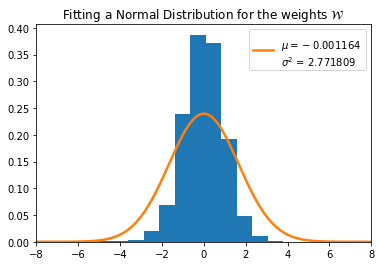

In [12]:
W_ = W.cpu().numpy().reshape((W.shape[0]*W.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma^2$ = %f' % (muW_, sigmaW_**2 ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.xlim([-8, 8])
plt.show()

In [13]:
del W
torch.cuda.empty_cache()

### Case $T=0$ "DOWN" and $ T = \infty$

#### Creating the dataset

Frozen configurations:

In [14]:
n_states = 1000

training_lowT_up = nn.init.constant_(torch.empty(n_states, L*L),
                                     val= 0.0)

Constructing and shuffling the training set:

In [15]:
training_set = torch.cat((training_lowT_up, data_set_high), 0)

training_set = training_set[torch.randperm(training_set.size()[0])]

#### Training the model

For simplification, the units have no bias.

RBM --- Nv= 100, Nh= 100, lr= 1.0E-02, k= 1, Bsize= 100, Epochs= 30000, USE_CUDA= True, verbose= 100
Starting training
Ep 100, Rec er: 0.252895 (train), Pseud_Lik: -6.350019, Time: 2.598228 
Ep 200, Rec er: 0.251340 (train), Pseud_Lik: -4.573207, Time: 2.719006 
Ep 300, Rec er: 0.249400 (train), Pseud_Lik: -3.781354, Time: 2.068113 
Ep 400, Rec er: 0.249460 (train), Pseud_Lik: -3.301510, Time: 1.852283 
Ep 500, Rec er: 0.250000 (train), Pseud_Lik: -2.974623, Time: 1.991065 
Ep 600, Rec er: 0.250180 (train), Pseud_Lik: -2.719613, Time: 2.438356 
Ep 700, Rec er: 0.250430 (train), Pseud_Lik: -2.529340, Time: 2.044186 
Ep 800, Rec er: 0.251970 (train), Pseud_Lik: -2.377619, Time: 1.854536 
Ep 900, Rec er: 0.250830 (train), Pseud_Lik: -2.247937, Time: 1.870405 
Ep 1000, Rec er: 0.250975 (train), Pseud_Lik: -2.141520, Time: 1.808346 
Ep 1100, Rec er: 0.250610 (train), Pseud_Lik: -2.047171, Time: 1.724512 
Ep 1200, Rec er: 0.250750 (train), Pseud_Lik: -1.962223, Time: 1.733290 
Ep 1300, Rec e

Ep 11200, Rec er: 0.250620 (train), Pseud_Lik: -0.679286, Time: 2.062131 
Ep 11300, Rec er: 0.250655 (train), Pseud_Lik: -0.677499, Time: 2.009107 
Ep 11400, Rec er: 0.250040 (train), Pseud_Lik: -0.673556, Time: 2.231872 
Ep 11500, Rec er: 0.249050 (train), Pseud_Lik: -0.670909, Time: 1.803705 
Ep 11600, Rec er: 0.250575 (train), Pseud_Lik: -0.667717, Time: 1.896315 
Ep 11700, Rec er: 0.249170 (train), Pseud_Lik: -0.664919, Time: 1.805799 
Ep 11800, Rec er: 0.250405 (train), Pseud_Lik: -0.663483, Time: 1.778715 
Ep 11900, Rec er: 0.250130 (train), Pseud_Lik: -0.659428, Time: 1.772762 
Ep 12000, Rec er: 0.249575 (train), Pseud_Lik: -0.657610, Time: 1.780380 
Ep 12100, Rec er: 0.249300 (train), Pseud_Lik: -0.654462, Time: 1.938254 
Ep 12200, Rec er: 0.250585 (train), Pseud_Lik: -0.652742, Time: 1.923726 
Ep 12300, Rec er: 0.248725 (train), Pseud_Lik: -0.649922, Time: 1.926850 
Ep 12400, Rec er: 0.249695 (train), Pseud_Lik: -0.647304, Time: 1.912880 
Ep 12500, Rec er: 0.249950 (train), Ps

Ep 22300, Rec er: 0.249310 (train), Pseud_Lik: -0.491290, Time: 1.944636 
Ep 22400, Rec er: 0.250230 (train), Pseud_Lik: -0.490829, Time: 1.902559 
Ep 22500, Rec er: 0.250590 (train), Pseud_Lik: -0.489558, Time: 1.855384 
Ep 22600, Rec er: 0.250675 (train), Pseud_Lik: -0.489327, Time: 1.847125 
Ep 22700, Rec er: 0.250040 (train), Pseud_Lik: -0.487123, Time: 1.842306 
Ep 22800, Rec er: 0.249625 (train), Pseud_Lik: -0.487077, Time: 1.918372 
Ep 22900, Rec er: 0.249830 (train), Pseud_Lik: -0.485704, Time: 1.812342 
Ep 23000, Rec er: 0.251270 (train), Pseud_Lik: -0.484284, Time: 1.839295 
Ep 23100, Rec er: 0.249670 (train), Pseud_Lik: -0.483539, Time: 1.839641 
Ep 23200, Rec er: 0.250230 (train), Pseud_Lik: -0.482450, Time: 1.865239 
Ep 23300, Rec er: 0.249560 (train), Pseud_Lik: -0.481503, Time: 1.875212 
Ep 23400, Rec er: 0.248930 (train), Pseud_Lik: -0.480410, Time: 1.838613 
Ep 23500, Rec er: 0.250370 (train), Pseud_Lik: -0.480174, Time: 1.834753 
Ep 23600, Rec er: 0.249475 (train), Ps

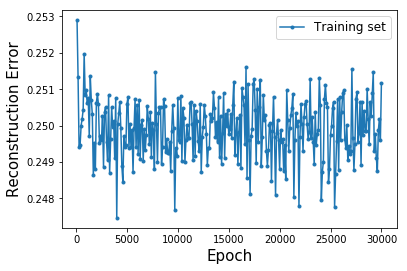

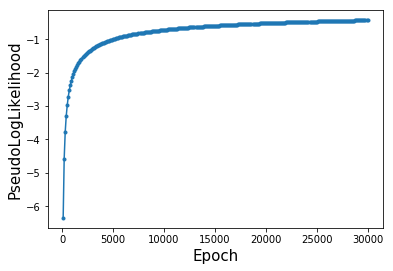

In [16]:
Nv = training_set.shape[1]
Nh = training_set.shape[1]

lr = 0.01
k_learning = 1
batch_size = 100
nb_epoch = 30000
k_sampling = 1

rbm = RBM(num_visible= training_set.shape[1], 
          num_hidden= Nh, 
          bias= False,
          T= 1.0,
          use_cuda= True)
    
rbm.learn(training_set= training_set,  
          lr= lr, 
          nb_epoch= nb_epoch, 
          batch_size= batch_size,
          k_learning= k_learning,
          verbose= 100)

#### Saving the trained model

In [22]:
nb_epoch= rbm.num_train_epochs()

name = 'RBM_model_only_Tzero_Tinf__DOWN_nv%d_nh%d_lr%.1E_k%d_bsize%d_nepochs%d' % (Nv,
                                                                                  Nh,
                                                                                  lr,
                                                                                  k_learning,
                                                                                  batch_size,
                                                                                  nb_epoch)

PATH = 'RBM_trained_models/'+ name + '.pt'

torch.save(rbm, PATH)

In [17]:
W, v, h = rbm.parameters()

del v
del h
torch.cuda.empty_cache()

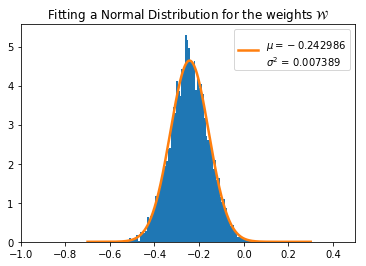

In [21]:
W_ = W.cpu().numpy().reshape((W.shape[0]*W.shape[1]))

# Plot normalized histogram 
plt.hist(W_, bins= 100, density= True)

# Maximum and minimum of xticks to compute the theoretical distribution 
x_min, x_max = min(plt.xticks()[0]), max(plt.xticks()[0])  
domain = np.linspace(x_min, x_max, len(W_))

# Fitting a normal distribution
muW_, sigmaW_ = stats.norm.fit(W_) 

plot_pdf = stats.norm.pdf(domain, muW_, sigmaW_) # Fitting the PDF in the interval


plt.plot(domain, plot_pdf, linewidth= 2.5,
         label= '$\mu= %f$ \n$\sigma^2$ = %f' % (muW_, sigmaW_**2 ))

plt.title('Fitting a Normal Distribution for the weights ${\cal W}$')
plt.legend()
plt.xlim([-1, 0.5])
plt.show()

In [23]:
del W
torch.cuda.empty_cache()